## Übungen zu Funktionen gleich mit Bezug zur KI
In den Listen x und y wurde erfasst, wie der zeitliche Aufwand bei der Vorbereitung auf eine Klausur mit den dabei erzielten Punkten korreliert.  
Dieser Zusammenhang lässt sich näherungsweise über eine Geradengleichung beschreiben.

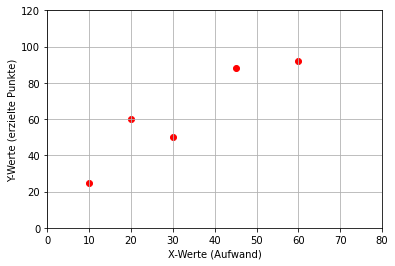

In [1]:
x = [10,20,45,30,60]
y = [25,60,88,50,92]

import matplotlib.pyplot as plt
xmin=0
xmax=80
ymin=-0
ymax=120
plt.axis([xmin, xmax, ymin, ymax])
plt.scatter(x, y, color="red")
plt.xlabel("X-Werte (Aufwand)")
plt.ylabel("Y-Werte (erzielte Punkte)")
plt.grid(True)
plt.show()

#### Einfache Lineare Regression

#### Formeln:

  - $m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$ 
    
  - $b = \bar{y} - m \cdot \bar{x}$
  
  - $y = m \cdot x + b$


  - $mse =\frac{1}{n} \cdot \sum_{i=1}^n(y_i-\hat{y}_i)^2$

  - $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$

#### Bedeutung:
  - $m :=$ Steigung der Geraden
  - $b :=$ y-Achsenabschnitt
  - $mse :=$ Mean Squared Error 
  - $R^2 :=$ Bestimmtheitsmaß. Wie viel Streuung kann durch das Regressionsmodell erklärt werden

  
#### Symbole:
  - $\bar{x} :=$ Mittelwert von $x$
  - $\hat{y} :=$ Schätzung zum Wert x

#### Einfache Lineare Regression Programmieren

In [2]:
# Berechne den Mittelwert zur Liste x
def compute_mean(x):
#    sum = 0
#    for xe in x:
#        sum+=xe
#    return sum / len(x)
    return sum(x) / len(x)    

In [3]:
# Berechne die Steigung der Geraden (Parameter m)
def compute_slope(x, y, x_mean, y_mean):
    frac1 = sum([(x[i] - x_mean)*(y[i] - y_mean) for i in range(len(x))])
    frac2 = sum([(x[i] - x_mean)**2 for i in range(len(x))])
    slope = frac1 / frac2
    return slope

In [4]:
# Berechne den Y-Achsabschnitt der Geraden (Parameter b)
def compute_intercept(x_mean, y_mean, slope):
    intercept = y_mean - slope * x_mean
    return intercept

In [5]:
# Berechne den Y-Wert passend zum X-Wert, wenn die Steigung und der Y-Achsabschnitt bekannt ist
def compute_y(x_value, slope, intercept):
    return x_value*slope + intercept

In [6]:
# Berechne die y-Werte (Regressions-Linie) bei bekannter Steigung und Y-Achsabschnitt
# für alle Elemente aus der Liste x
# Rückgabewert ist eine Liste mit Funktions-Werten die zu allen x-Werten erwartet werden
def compute_regression(x, slope, intercept):
    regression_line = [slope * x[i] + intercept for i in range(len(x))]
    return regression_line

In [7]:
# berechne den Mean Squared Error mse
# Mittlerer Abstand von realen zu erwarteten Werten
# regression_line wird auch oft y_pred von Predicted bezeichnet
def compute_mse(y,  regression_line):
    frac1 = sum([(y[i] - regression_line[i])**2 for i in range(len(y))])
    mse = frac1 / len(y)
    return mse

In [8]:
# berechne das Bestimmheitsmaß R^2
def compute_r2(y, y_mean, regression_line):
    frac1 = sum([(y[i] - regression_line[i])**2 for i in range(len(y))])
    frac2 = sum([(y[i] - y_mean)**2 for i in range(len(y))])
    r2 = 1 - frac1 / frac2
    return r2

# optimiert
#    y_d=[y_mean for a in y]
#    return 1-(compute_mse(y,regression_line)/compute_mse(y,y_d))

##### Starting Training and Testing Functions

In [9]:
# compute and print x_mean, y_mean
x_mean = compute_mean(x)
y_mean = compute_mean(y)
print(x_mean)
print(y_mean)

33.0
63.0


In [10]:
# compute and print slope, intercept
slope = compute_slope(x,y,x_mean,y_mean)
intercept = compute_intercept(x_mean,y_mean,slope)
print("y= ",slope,"*x + ",intercept)

y=  1.2879746835443038 *x +  20.496835443037973


In [11]:
# compute y_value for x=50
y_value = compute_y(50,slope,intercept)
print(y_value)
y_values = compute_regression([50],slope,intercept)
print(y_values)
# compute regression values for all x
regression = compute_regression(x,slope,intercept)
print(regression)
# compute mse
mse = compute_mse(y,regression)
print(mse)
# compute r2
r2 = compute_r2(y,y_mean,regression)
print(r2)

84.89556962025316
[84.89556962025316]
[33.37658227848101, 46.25632911392405, 78.45569620253164, 59.13607594936709, 97.77531645569621]
93.39430379746838
0.8487786531776742


#### Starting Plotting

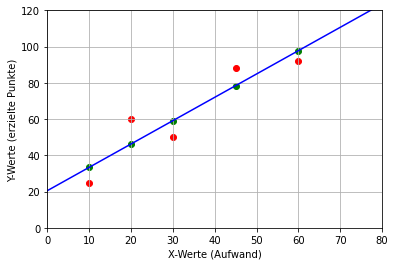

In [17]:
# plot regression line 
# scatter y-values an regression-values
import matplotlib.pyplot as plt
x1=0
x2=80
y1=slope*x1+intercept
y2=slope*x2+intercept
plt.plot([x1,x2],[y1,y2],color="blue")
plt.scatter(x,regression,color="green")
xmin=0
xmax=80
ymin=-0
ymax=120
plt.axis([xmin, xmax, ymin, ymax])
plt.scatter(x, y, color="red")
plt.xlabel("X-Werte (Aufwand)")
plt.ylabel("Y-Werte (erzielte Punkte)")
plt.grid(True)
plt.show()